<a href="https://colab.research.google.com/github/AraksiaGevorgyan/Machine-Learning/blob/main/TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install prophet

In [3]:
!pip install pystan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 52.5 MB/s eta 0:00:00


In [24]:
import pandas as pd
import prophet

In [25]:
df = pd.read_csv("dataset.csv")

In [26]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [27]:
print(df['Product'].unique())
print(df['Store'].unique())


[2667437]
['QLD_CW_ST0203']


In [28]:
df['Time Date'] = df['Time Date'].astype(str).str.zfill(8)
df['Time Date'] = pd.to_datetime(df['Time Date'], format='%d%m%Y')

In [29]:
df.head()

,Time Date,Product,Store,Value
0,2018-01-01,2667437,QLD_CW_ST0203,2926.000
1,2018-01-02,2667437,QLD_CW_ST0203,2687.531
2,2018-01-03,2667437,QLD_CW_ST0203,2793.000
3,2018-01-04,2667437,QLD_CW_ST0203,2394.000
4,2018-01-05,2667437,QLD_CW_ST0203,2660.000


In [30]:
df.drop(['Product', 'Store'], axis = 1, inplace = True)

In [31]:
df.columns = ["ds", 'y']

In [32]:
df.head()

,ds,y
0,2018-01-01,2926.000
1,2018-01-02,2687.531
2,2018-01-03,2793.000
3,2018-01-04,2394.000
4,2018-01-05,2660.000


In [33]:
import matplotlib.pyplot as plt

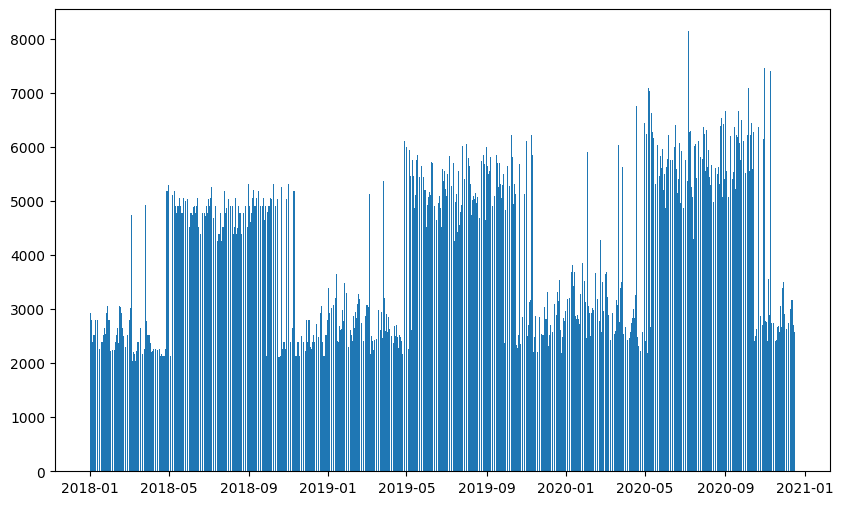

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(df['ds'], df['y'])
plt.show()

#Model Training

In [35]:
from prophet import Prophet

In [36]:
m = Prophet()
model = m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphoj8w6fq/u6dso_6t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphoj8w6fq/p_yz329y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=355', 'data', 'file=/tmp/tmphoj8w6fq/u6dso_6t.json', 'init=/tmp/tmphoj8w6fq/p_yz329y.json', 'output', 'file=/tmp/tmphoj8w6fq/prophet_modelv60lec5m/prophet_model-20240907180033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:00:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:00:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#Forecast away

In [37]:
future = m.make_future_dataframe(periods = 50, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3537.381886,1427.354239,3396.182773,3537.381886,3537.381886,-1113.095060,-1113.095060,-1113.095060,16.561447,16.561447,16.561447,-1129.656507,-1129.656507,-1129.656507,0.0,0.0,0.0,2424.286826
1,2018-01-02,3537.944622,1376.283750,3393.418193,3537.944622,3537.944622,-1123.704126,-1123.704126,-1123.704126,-11.317876,-11.317876,-11.317876,-1112.386250,-1112.386250,-1112.386250,0.0,0.0,0.0,2414.240496
2,2018-01-03,3538.507359,1370.265962,3517.412138,3538.507359,3538.507359,-1098.339254,-1098.339254,-1098.339254,-4.421756,-4.421756,-4.421756,-1093.917498,-1093.917498,-1093.917498,0.0,0.0,0.0,2440.168105
3,2018-01-04,3539.070095,1451.610081,3460.426175,3539.070095,3539.070095,-1051.834714,-1051.834714,-1051.834714,22.486458,22.486458,22.486458,-1074.321172,-1074.321172,-1074.321172,0.0,0.0,0.0,2487.235381
4,2018-01-05,3539.632832,1386.087154,3414.352917,3539.632832,3539.632832,-1088.273266,-1088.273266,-1088.273266,-34.552020,-34.552020,-34.552020,-1053.721246,-1053.721246,-1053.721246,0.0,0.0,0.0,2451.359566


In [38]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1125,2021-01-31,4653.431732,2864.301810,4880.094170,4652.657411,4654.203711,-783.731260,-783.731260,-783.731260,25.259625,25.259625,25.259625,-808.990885,-808.990885,-808.990885,0.0,0.0,0.0,3869.700473
1126,2021-02-01,4654.509231,2876.127920,4963.147085,4653.707872,4655.307431,-794.705422,-794.705422,-794.705422,16.561447,16.561447,16.561447,-811.266870,-811.266870,-811.266870,0.0,0.0,0.0,3859.803809
1127,2021-02-02,4655.586729,2781.589320,4957.645269,4654.760714,4656.440670,-823.857925,-823.857925,-823.857925,-11.317876,-11.317876,-11.317876,-812.540049,-812.540049,-812.540049,0.0,0.0,0.0,3831.728804
1128,2021-02-03,4656.664228,2814.044854,4800.278879,4655.811097,4657.521698,-817.100902,-817.100902,-817.100902,-4.421756,-4.421756,-4.421756,-812.679147,-812.679147,-812.679147,0.0,0.0,0.0,3839.563325
1129,2021-02-04,4657.741726,2869.588169,4970.889860,4656.862418,4658.644970,-789.124512,-789.124512,-789.124512,22.486458,22.486458,22.486458,-811.610970,-811.610970,-811.610970,0.0,0.0,0.0,3868.617213


#Filter the forecast dataframe

In [39]:
last_date = df['ds'].max()
future_forecast = forecast[forecast['ds']>last_date]

In [40]:
future_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1080,2020-12-17,4604.944305,2190.689300,4311.262692,4604.944305,4604.944305,-1305.284699,-1305.284699,-1305.284699,22.486458,22.486458,22.486458,-1327.771157,-1327.771157,-1327.771157,0.0,0.0,0.0,3299.659606
1081,2020-12-18,4606.021804,2237.526564,4255.339385,4606.021804,4606.021804,-1345.032248,-1345.032248,-1345.032248,-34.552020,-34.552020,-34.552020,-1310.480228,-1310.480228,-1310.480228,0.0,0.0,0.0,3260.989556
1082,2020-12-19,4607.099302,2219.117248,4408.239085,4607.099302,4607.099302,-1308.584358,-1308.584358,-1308.584358,-14.015878,-14.015878,-14.015878,-1294.568481,-1294.568481,-1294.568481,0.0,0.0,0.0,3298.514944
1083,2020-12-20,4608.176800,2357.927165,4453.032385,4608.176800,4608.176800,-1254.678888,-1254.678888,-1254.678888,25.259625,25.259625,25.259625,-1279.938513,-1279.938513,-1279.938513,0.0,0.0,0.0,3353.497912
1084,2020-12-21,4609.254299,2259.241217,4365.639751,4609.254299,4609.254299,-1249.878080,-1249.878080,-1249.878080,16.561447,16.561447,16.561447,-1266.439527,-1266.439527,-1266.439527,0.0,0.0,0.0,3359.376219


#Visualisation

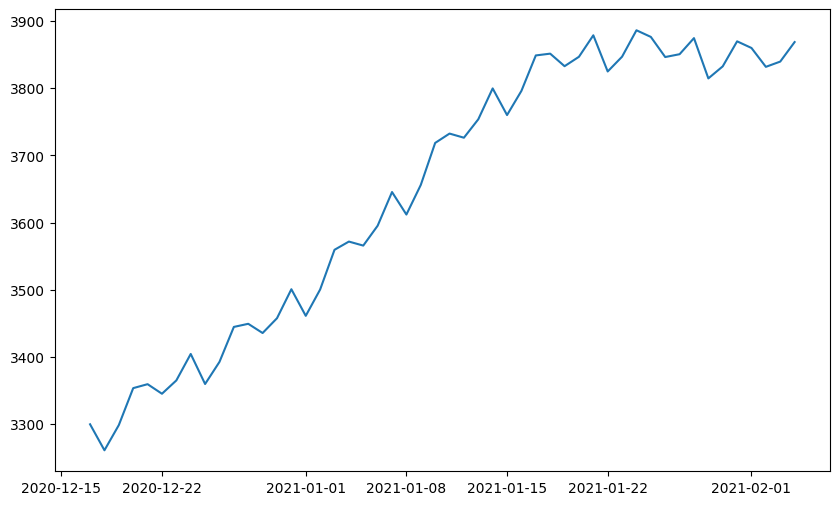

In [41]:
plt.figure(figsize=(10, 6))
plot1 = plt.plot(future_forecast['ds'], future_forecast['yhat'])
plt.xlabel = 'Date'
plt.ylabel = 'Value'
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

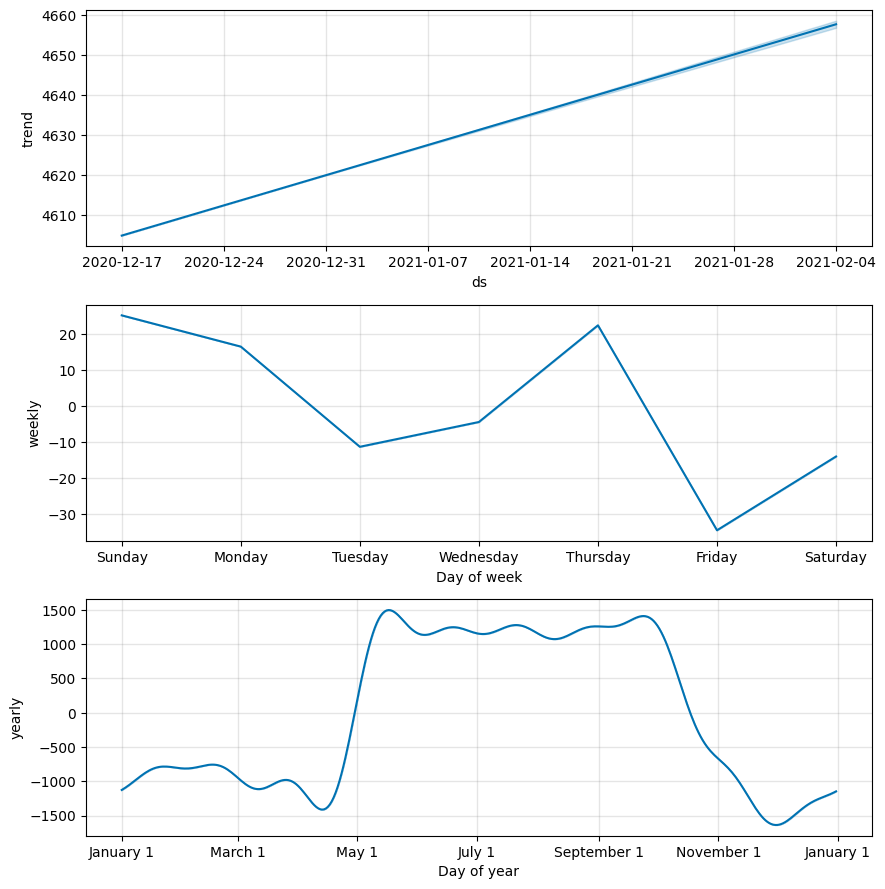

In [42]:
plt2 = m.plot_components(future_forecast)